In [39]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
from matplotlib import pyplot as plt
import re

In [40]:
data3 = pd.read_excel('GooglePlaystore.xlsx')
#data3.info()

## Preprocessing

**[3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.**

In [41]:
ind = (data3[data3.Reviews == "3.0M"]).index
#print(list(ind))
data3 = data3.drop(ind)
#data3

[4 pts] Remove rows where any of the columns has the value "Varies with device".

In [42]:
ind2 = data3[(data3 == 'Varies with device').any(axis=1)].index
#print((list(ind2)))
#print(data3.head(45))
data3 = data3.drop(ind2)
#data3
#data3.info()

[5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [43]:
data3['Android Ver'] = data3['Android Ver'].str.extract(r'(\d+.\d+)')
#print(data3)
#data3.info()

[5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.


In [44]:
#data3['Installs'] = data3['Installs'].apply(lambda x: x.replace(",", "").replace("+", "").strip() if type(x) == str else x)
data3['Installs'] = data3['Installs'].apply(lambda x: re.sub(r'\+$','',x.replace(",", "").strip()) if type(x) == str else x)
#print(data3)
data3['Installs'] = data3['Installs'].apply(lambda x: int(x) if type(x) == str and x.isdigit() == True else 'NaN')
#print(data3)

indices = data3[(data3['Installs'] == 'NaN')].index
#print(indices)
data3 = data3.drop(indices)
#data3

[5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [45]:
ind3 = data3[(np.isnan(data3.Rating) == True) & (data3.Reviews < 100) & (data3.Installs < 50000)].index
data3 = data3.drop(ind3)
#data3

df_imt = data3.groupby(['Category']).mean()
#print(df_imt)
#print(data3.head(25))
data3['Rating'] = data3[['Category', 'Rating']].apply(lambda x: df_imt.loc[x['Category']]['Rating'].round(2) if np.isnan(x['Rating']) else x['Rating'], axis=1)
#print(data3.head(25))
#data3.info()

[6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [46]:
def toNumeric(x):
    if (type(x) == str):
        if x[-1] == 'M' or x[-1] == 'm':
            x = x[:-1]
            x = float(x)
            x = x*1000000
            x = int(x)
            #x = str(x)
            return x;
        
        elif x[-1] == 'K' or x[-1] == 'k':
            x = x[:-1]
            x = float(x)
            x = x*1000
            x = int(x)
            #x = str(x)
            return x;
              
        else:
            return x
    else:
        return x
    
data3['Size'] = data3['Size'].apply(toNumeric)
#print(data3)
#data3.info()

## Analysis

[4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [47]:
df_imt = data3.groupby(['Category'])
#print(df_imt.describe())
df_imt.describe()['Rating']

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


[11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
Rating (gives top 3 most highly rated applications in each category)
Installs (gives top 3 most installed applications in each category)
Reviews (gives top 3 most reviewed applications in each category)
You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column.

In [48]:
data3['Reviews'] = data3['Reviews'].apply(lambda x: int(x))
free_aps = data3[data3['Type'] == 'Free']
categories = free_aps['Category'].unique()

def getTop3(columnName):
    list_final = []
    for category in categories:
        
        df_imt = free_aps[free_aps['Category'] == category]
        
        #print(df_imt.nlargest(3, columnName))
        
        #print(df_imt['Rating'].sort_values(ascending = False))
        
        list_curr = df_imt.nlargest(3, columnName).index.tolist()
    
        list_final.extend(list_curr)
    
    list_final = sorted(list_final)
    print(free_aps.loc[list_final][['App', 'Category', columnName]])

print('Rating: ')
getTop3('Rating')
print()
print('Installs: ')
getTop3('Installs')
print()
print('Reviews: ')
getTop3('Reviews')

Rating: 
                                                     App           Category  \
25                            Harley Quinn wallpapers HD     ART_AND_DESIGN   
55     Tickets SDA 2018 and Exam from the State Traff...  AUTO_AND_VEHICLES   
61                        CDL Practice Test 2018 Edition  AUTO_AND_VEHICLES   
64                 DMV Permit Practice Test 2018 Edition  AUTO_AND_VEHICLES   
98                            Hush - Beauty for Everyone             BEAUTY   
...                                                  ...                ...   
9247                                           EC SPORTS             SPORTS   
9365                                Eh Bee Wallpapers HD    PERSONALIZATION   
10166                               FA Player Essentials             SPORTS   
10621                        Florida Beach Wallpapers HD   TRAVEL_AND_LOCAL   
10656                               Wallpapers FN SCAR H    PERSONALIZATION   

       Rating  
25        4.8  
55        

[4 pts] Find the average, maximum and minimum price of the paid applications.

In [49]:
#converting price column to float type
def toFloat(x):
    x = str(x)
    x.replace('$', '')
    x = float(x)
    return x
        
data3['Price'] = data3['Price'].apply(toFloat)
#data3.info()

paid_apps = data3[data3['Type'] == 'Paid']
#print(paid_apps)
#paid_apps.describe()
price_attributes = paid_apps.describe()['Price']
#print(price_attributes)
print('Average Price of Paid Applications',str(price_attributes['mean']))
print('Max Price of Paid Applications',str(price_attributes['max']))
print('Min Price of Paid Applications',str(price_attributes['min']))

Average Price of Paid Applications 15.139163763066062
Max Price of Paid Applications 400.0
Min Price of Paid Applications 0.99


## Visualization

[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()

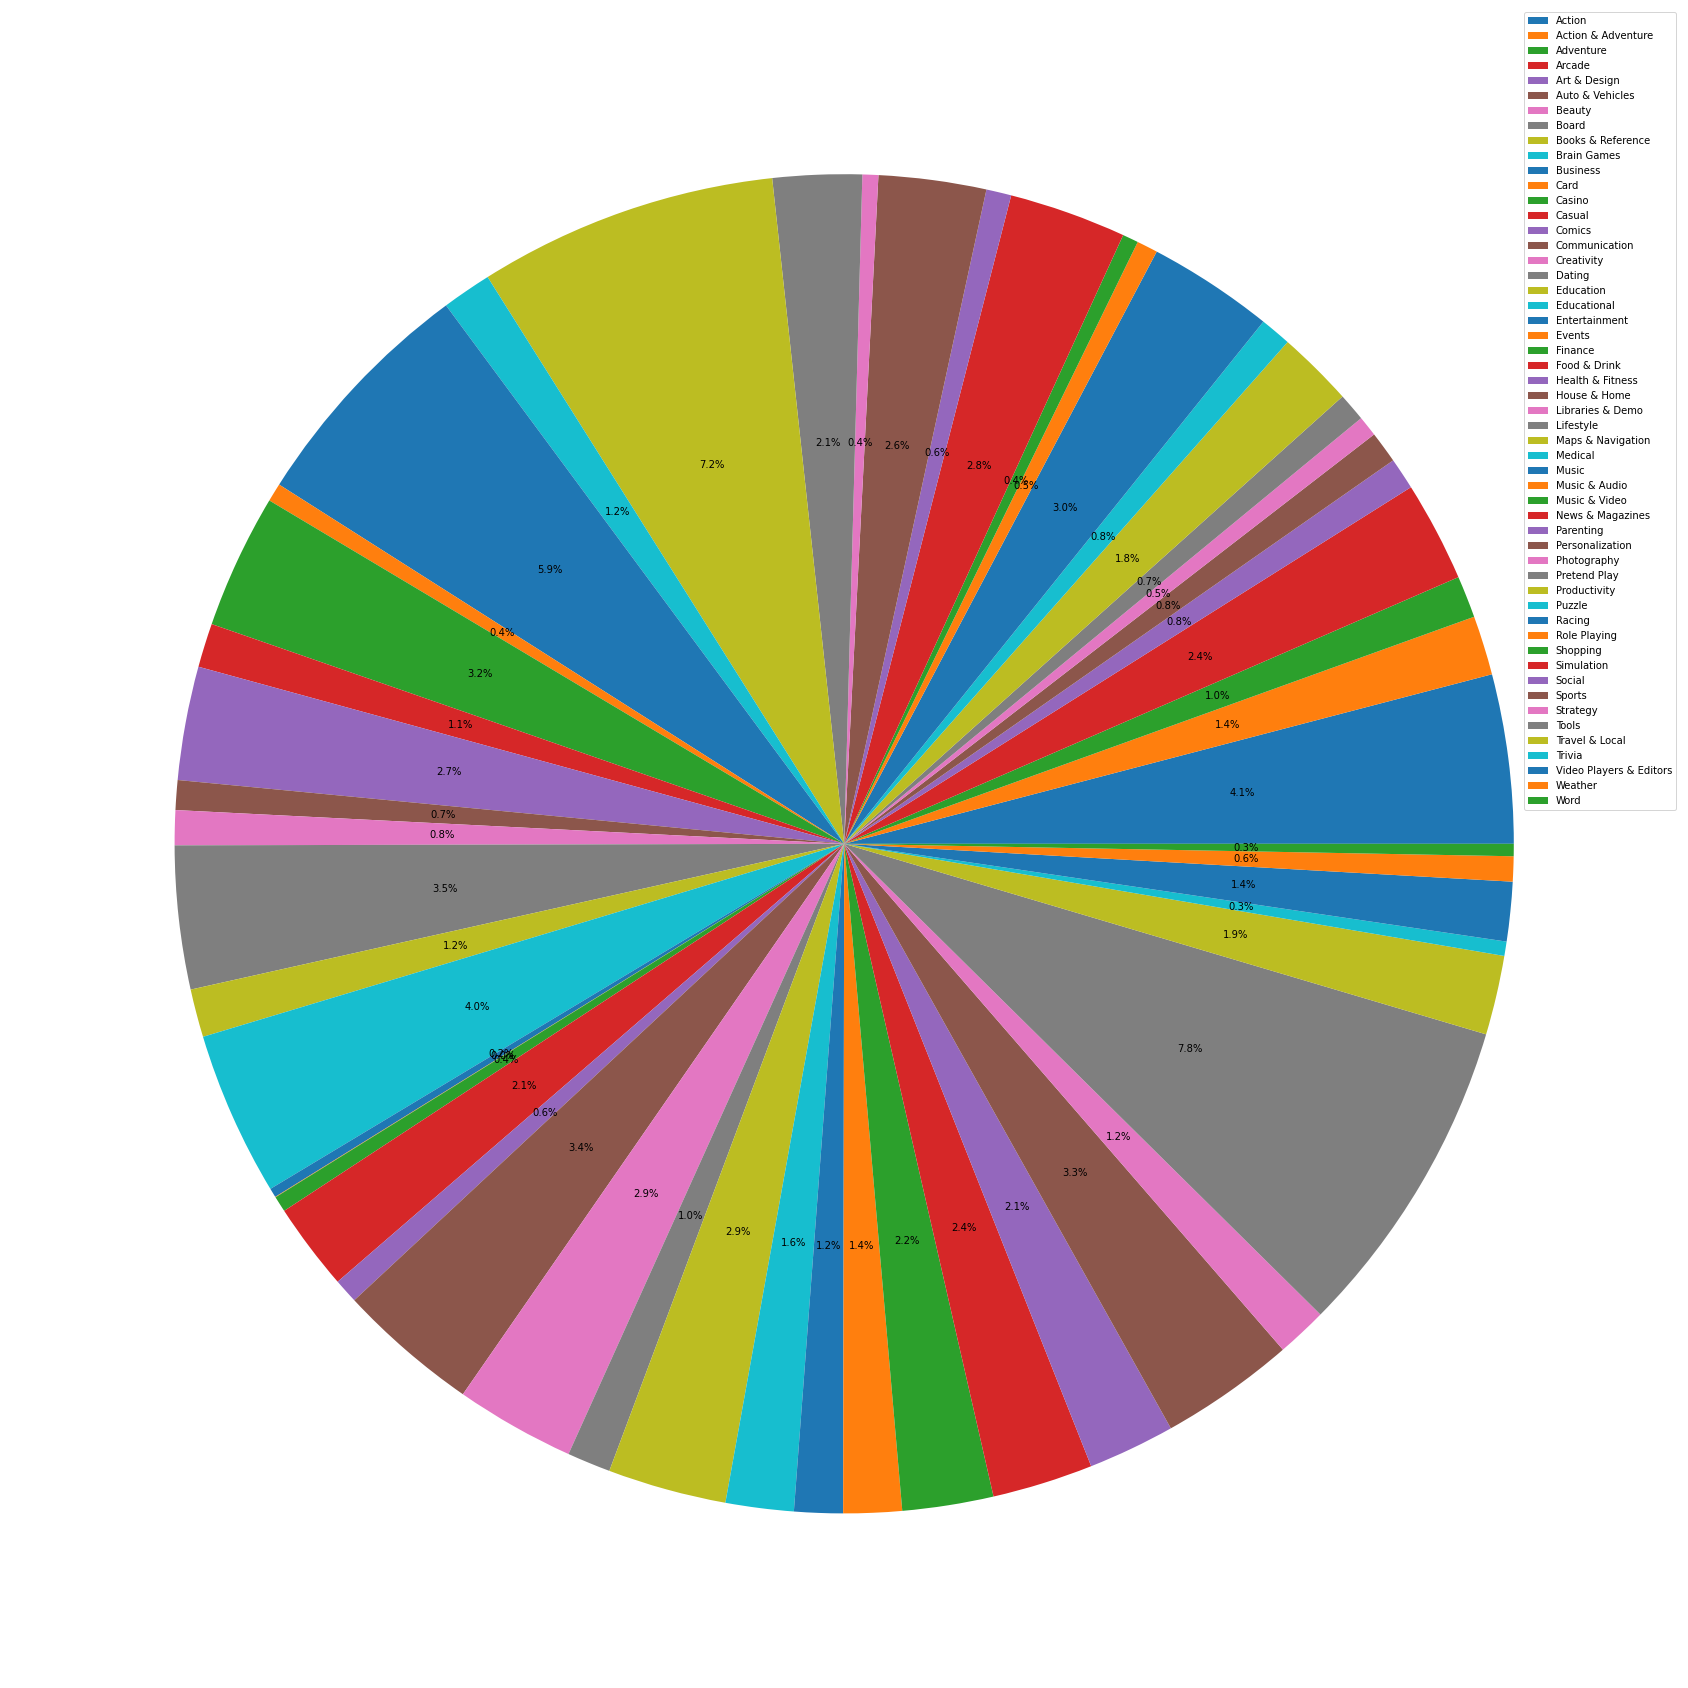

In [50]:
def toList(x):
    l = str(x).split(';')
    l_final = [e.strip() for e in l]
    return l_final

data3['Genres'] = data3['Genres'].apply(toList)
data3_explode = data3.explode('Genres')
genregrp = data3_explode.groupby('Genres').count()['App']
fig = plt.figure(figsize =(30, 70))
#sc = plt.pie(genregrp, labels = genregrp.keys())
sc = plt.pie(genregrp, autopct='%1.1f%%')
plt.legend(genregrp.keys())

[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

[Text(1, 0, 'Business'), Text(2, 0, 'Education')]

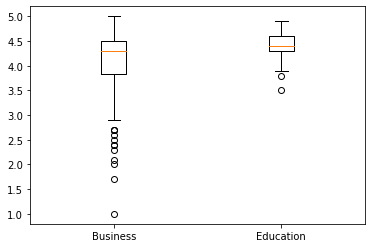

In [51]:
my_dict = {}

df_bus = data3[data3['Category'] == 'BUSINESS']
my_dict['Business'] = df_bus['Rating'].tolist()

df_edu = data3[data3['Category'] == 'EDUCATION']
my_dict['Education'] = df_edu['Rating'].tolist()

#print(my_dict)

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())